In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Create a dataset

In [2]:
# Set a seed
np.random.seed(100)
# Create three variables, x1, x2 and x3
x1 = 10*np.random.rand(1000)
x2 = -3*np.random.rand(1000)
x3 = 2*np.random.rand(1000)
# make y a linear combination of these variables, plus some noise
y = 11 + 1.5*x1 + 6*x2 -3*x3 + np.random.normal(loc = 0, scale = 3, size = 1000)
y = y.reshape(1000,1)

### Plot The data

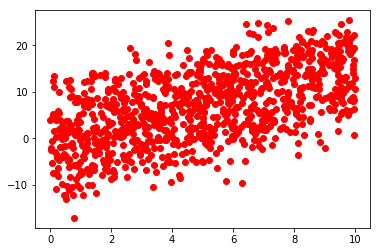

In [3]:
plt.plot(x1,y, 'ro')
plt.show()

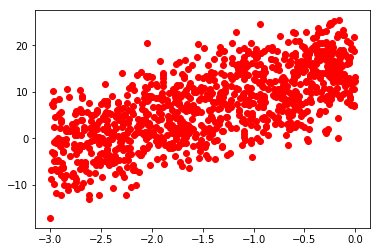

In [4]:
plt.plot(x2,y,'ro')
plt.show()

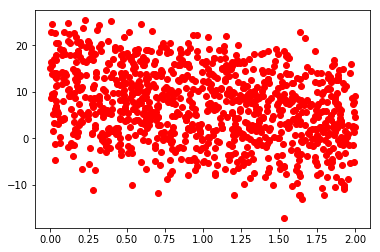

In [5]:
plt.plot(x3,y,'ro')
plt.show()

### Solve via least squares
#### Arrange data in a matrix

In [6]:
# Create a 1000 x 4 matrix, with a column for ones as the intercept
# Call the matrix X
model_mat = np.matrix([[1]*1000,x1,x2,x3]).transpose()
X = model_mat

#### Solve for \hat{Y} = (X'X)^{-1}X'Y

In [7]:
beta_hat = (X.getT()*X).getI()*X.getT()*y
print(beta_hat)

[[10.99893204]
 [ 1.53962012]
 [ 6.00691754]
 [-3.10681959]]


#### What is the SSE?

In [8]:
residuals = beta_hat[0] + beta_hat[1]*x1 + beta_hat[2]*x2 + beta_hat[3]*x3
sse = np.sum(np.multiply(residuals,residuals))
print(sse)

100488.2871809499


### Solve via tensorflow

In [9]:
# placeholders are for data input
# variables are parameters to train


b  = tf.Variable([.3], dtype=tf.float32) #bias
w1 = tf.Variable([.2], dtype=tf.float32)
w2 = tf.Variable([.1], dtype=tf.float32)
w3 = tf.Variable([[0]], dtype=tf.float32)

# using capital "X" to indicate variables, the data is stored in lowercase "x"
X1 = tf.placeholder(tf.float32)
X2 = tf.placeholder(tf.float32)
X3 = tf.placeholder(tf.float32)


#### Create the graph

In [10]:
model = b + w1*X1 + w2*X2 + w3*X3
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# This will evaluate the model at the current values of w1, w2 and w3 at the 100 differenet levels of x1, x2 and x3
# This isn't training the model at all, but executing the computation graph. 
print(sess.run(model, {X1: x1, X2: x2, X3: x3}))

[[1.3784903  0.74206764 0.86305994 1.9228927  0.21789989 0.2973423
  1.4679574  1.9434205  0.28709686 1.3565451  2.0274222  0.7134634
  0.51343817 0.46666676 0.49551243 2.2563975  1.893595   0.5168708
  1.9307069  0.654969   1.0056416  2.105333   1.8539401  0.95458204
  0.36276397 0.9973905  0.07300974 0.68022853 1.8524286  0.3135188
  1.4386     1.4935693  0.2396287  0.81267536 0.22946751 2.042506
  2.159613   0.28161323 2.0271282  1.2974998  1.5541321  1.3361996
  1.2042806  0.11164172 0.46429616 1.3090005  1.6194732  0.5950968
  0.7665271  1.8159703  2.1328464  1.9153781  0.9278267  1.2586179
  0.97724444 0.75612605 0.36608946 0.7282415  0.12785581 1.0965302
  0.94770783 1.4291873  1.2923805  0.48160377 2.1060505  2.1599407
  1.2976133  1.0652319  0.8824447  0.5531985  0.6857748  0.5060178
  0.415335   2.0162287  1.9505308  1.2062078  1.6606914  0.7627049
  0.2962396  0.98418266 1.0679542  0.20002866 1.1118392  2.198797
  0.9083122  0.89289373 1.6665072  1.6693577  0.84414804 1.5277

#### Create the loss function - because we're attempting to mimic least squares regression we'll use squared error as our loss

In [11]:
# create the variable Y using the uppercase
Y = tf.placeholder(tf.float32)
squared_error = tf.square(model - Y)
loss = tf.reduce_sum(squared_error)
sess.run(init) # this was key
#sess.run(model, {X1: x1, X2: x2, X3: x3, Y: y})
print(sess.run(loss, {X1: x1, X2: x2, X3: x3, Y: y}))


95199890.0


#### Use an algorithm to find the correct weights

In [12]:
optimizer = tf.train.GradientDescentOptimizer(0.00000001)
train = optimizer.minimize(loss)
sess.run(init) # reset values to incorrect defaults.
for i in range(100):
    sess.run(train, {X1: x1, X2: x2, X3: x3, Y: y})
    #print(sess.run([loss], {X1: x1, X2: x2, X3: x3, Y: y}))


curr_b, curr_w1, curr_w2, curr_w3, curr_loss = sess.run([b,w1,w2,w3,loss], {X1: x1, X2: x2, X3: x3, Y: y})
print(curr_b, curr_w1, curr_w2, curr_w3, curr_loss)

[2.0499146] [0.33848634] [-1.0685083] [[1.1885232]] 63566776.0


In [13]:
print(sse)

100488.2871809499


 The best fit line has error 100,500, roughly but after 100 iterations gradient descent as error of 64 million!

In [14]:
print([curr_b, curr_w1, curr_w2, curr_w3])
print(beta_hat)

[array([2.0499146], dtype=float32), array([0.33848634], dtype=float32), array([-1.0685083], dtype=float32), array([[1.1885232]], dtype=float32)]
[[10.99893204]
 [ 1.53962012]
 [ 6.00691754]
 [-3.10681959]]


Instead of 100 iterations, try 10,000 and see where we are

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.00000001)
train = optimizer.minimize(loss)
sess.run(init) # reset values to incorrect defaults.
for i in range(10000):
    sess.run(train, {X1: x1, X2: x2, X3: x3, Y: y})
    if i % 1000 == 0:
        print(i)


curr_loss = sess.run([loss], {X1: x1, X2: x2, X3: x3, Y: y})
print(curr_loss)

After that the error is still really high! Go for 1 million.

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.00000001)
train = optimizer.minimize(loss)
sess.run(init) # reset values to incorrect defaults.
for i in range(100000):
    sess.run(train, {X1: x1, X2: x2, X3: x3, Y: y})
    if i % 10000 == 0:
        print(i)


curr_loss = sess.run([loss], {X1: x1, X2: x2, X3: x3, Y: y})
print(curr_loss)

What makes this challenging is that the learning rate needs to be this low otherwise the loss function blows up.
What else can we try:
- center and scale the input parameters
- minibatches
- adam optimization, velocity

### Center and Scale the inputs

In [15]:
x1_scaled = (x1 - np.mean(x1))/np.std(x1)
x2_scaled = (x2 - np.mean(x2))/np.std(x2)
x3_scaled = (x3 - np.mean(x3))/np.std(x3)

#expect to see 0,1 in each of these
print([np.mean(x1_scaled),np.std(x1_scaled)])
print([np.mean(x2_scaled),np.std(x2_scaled)])
print([np.mean(x3_scaled),np.std(x3_scaled)])

[-8.970602038971265e-17, 1.0]
[-3.0908609005564356e-16, 1.0]
[-2.4868995751603507e-17, 1.0]


In [16]:
model_mat_scaled = np.matrix([[1]*1000,x1_scaled,x2_scaled,x3_scaled]).transpose()
X_scaled = model_mat_scaled
beta_hat_scaled = (X_scaled.getT()*X_scaled).getI()*X_scaled.getT()*y
print(beta_hat_scaled)
residuals_scaled = beta_hat_scaled[0] + beta_hat_scaled[1]*x1 + beta_hat_scaled[2]*x2 + beta_hat_scaled[3]*x3
sse_scaled = np.sum(np.multiply(residuals_scaled,residuals_scaled))
print(sse_scaled)


[[ 6.97084337]
 [ 4.4220803 ]
 [ 5.1972006 ]
 [-1.79553921]]
575644.4167408956


#### Try again with tensor flow

In [18]:
b_cs  = tf.Variable([.3], dtype=tf.float32) #bias
w1_cs = tf.Variable([.2], dtype=tf.float32)
w2_cs = tf.Variable([.1], dtype=tf.float32)
w3_cs = tf.Variable([[0]], dtype=tf.float32)

# using capital "X" to indicate variables, the data is stored in lowercase "x"
X1_cs = tf.placeholder(tf.float32)
X2_cs = tf.placeholder(tf.float32)
X3_cs = tf.placeholder(tf.float32)

model_cs = b_cs + w1_cs*X1_cs + w2_cs*X2_cs + w3_cs*X3_cs

Y = tf.placeholder(tf.float32)
squared_error = tf.square(model_cs - Y)
loss = tf.reduce_sum(squared_error)
optimizer = tf.train.GradientDescentOptimizer(0.00000001)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to incorrect defaults.
for i in range(10000):
    sess.run(train, {X1_cs: x1_scaled, X2_cs: x2_scaled, X3_cs: x3_scaled, Y: y})

curr_b, curr_w1, curr_w2, curr_w3, curr_loss = sess.run([b,w1,w2,w3,loss], {X1_cs: x1_scaled, X2_cs: x2_scaled, X3_cs: x3_scaled, Y: y})
print(curr_b, curr_w1, curr_w2, curr_w3, curr_loss)

[0.3] [0.2] [0.1] [[0.]] 61014750.0


In [19]:
print(curr_loss/sse_scaled)
print(61014650.0/sse)

105.99382227216748
607.1817095472085


a 6-fold decrease!

But that could also be a function of the weights, or the learning rate. Could I learn __faster__ with the centered 
and scaled versions?

In [20]:
optimizer = tf.train.GradientDescentOptimizer(0.0000001)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to incorrect defaults.
for i in range(10000):
    sess.run(train, {X1_cs: x1_scaled, X2_cs: x2_scaled, X3_cs: x3_scaled, Y: y})

curr_b, curr_w1, curr_w2, curr_w3, curr_loss = sess.run([b,w1,w2,w3,loss], {X1_cs: x1_scaled, X2_cs: x2_scaled, X3_cs: x3_scaled, Y: y})
print(curr_b, curr_w1, curr_w2, curr_w3, curr_loss)

[0.3] [0.2] [0.1] [[0.]] 61014756.0


In [21]:
print(curr_loss/sse_scaled)
print(61014650.0/sse)

105.9938292209016
607.1817095472085


So a larger learning rate did not effect this...

Try a different optimizer, Adam. Based on this [link](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) it may not be a good fit for this problem. Use the defaults.

In [17]:
optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to incorrect defaults.
for i in range(10000):
    sess.run(train, {X1_cs: x1_scaled, X2_cs: x2_scaled, X3_cs: x3_scaled, Y: y})

curr_b, curr_w1, curr_w2, curr_w3, curr_loss = sess.run([b,w1,w2,w3,loss], {X1_cs: x1_scaled, X2_cs: x2_scaled, X3_cs: x3_scaled, Y: y})
print(curr_b, curr_w1, curr_w2, curr_w3, curr_loss)

NameError: name 'X1_cs' is not defined

Compare just to non Adam optimizer:


In [ ]:
adam = 61014564.0
grad_desc = 61014756.0
print(adam/grad_desc)

Hardly a difference!

### What else can I try to make this algorithm learn faster?

#### Try mini-batch learning

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 10e-8)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to incorrect defaults.

tensor_dict = {"x1" : x1_scaled,
               "x2" : x2_scaled,
               "x3" : x3_scaled,
               "y"  : y}

#I think I need to set up the batches before hand...
x1_batch, x2_batch, x3_batch, y_batch = tf.train.batch(tensor_dict,
                                   batch_size=100)

for i in range(10000):
    sess.run(train, {X1_cs: x1_batch, X2_cs: x2_batch, X3_cs: x3_batch, Y: y_batch})

curr_b, curr_w1, curr_w2, curr_w3, curr_loss = sess.run([b,w1,w2,w3,loss], {X1_cs: x1_scaled, X2_cs: x2_scaled, X3_cs: x3_scaled, Y: y})
print(curr_b, curr_w1, curr_w2, curr_w3, curr_loss)

ValueError: Fetch argument 'x1' cannot be interpreted as a Tensor. ("The name 'x1' refers to an Operation not in the graph.")

In [ ]:
#### Maybe my computation graph isn't what I think it is? Let's try TensorBoard